In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import torch
import torch.nn as nn
import torch.optim as optim

import seaborn as sns

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

wDr = os.getcwd()

## Read in dynamic dataset

In [2]:
concatenated_df = pd.read_csv(r"C:\Users\anish\PhD\Bumper_simulation_gold\ML\ML_gold\Final_dataset.csv")
concatenated_df

,theta_min,theta_max,t_min,t_max,velocity,Peak Stress (MPa),Strain Energy Density (MPa)
0,0.93323,1.48222,2.59153,0.99390,1.0,0.74977,0.13977
1,1.56653,1.54725,2.29930,1.08162,1.0,0.34869,0.07186
2,1.09634,1.24884,1.36207,2.24614,1.0,0.38119,0.12755
3,1.32231,0.86132,1.01014,2.59830,1.0,0.70156,0.15535
4,1.33415,1.08084,1.45496,2.13960,1.0,0.36792,0.12347
...,...,...,...,...,...,...,...
6085,1.19075,0.92312,2.10032,1.51611,30.0,1.83001,0.47132
6086,1.33040,0.81491,1.46473,2.11912,30.0,3.32030,0.50955
6087,1.01106,0.91077,2.76858,0.87142,30.0,1.82495,0.44099
6088,1.08671,1.10612,1.02041,2.61912,30.0,4.37206,0.46279


## Data Visualisation

In [3]:
scaler = MinMaxScaler()

# Scale the velocity column
concatenated_df['velocity'] = scaler.fit_transform(concatenated_df[['velocity']])
concatenated_df

,theta_min,theta_max,t_min,t_max,velocity,Peak Stress (MPa),Strain Energy Density (MPa)
0,0.93323,1.48222,2.59153,0.99390,0.0,0.74977,0.13977
1,1.56653,1.54725,2.29930,1.08162,0.0,0.34869,0.07186
2,1.09634,1.24884,1.36207,2.24614,0.0,0.38119,0.12755
3,1.32231,0.86132,1.01014,2.59830,0.0,0.70156,0.15535
4,1.33415,1.08084,1.45496,2.13960,0.0,0.36792,0.12347
...,...,...,...,...,...,...,...
6085,1.19075,0.92312,2.10032,1.51611,1.0,1.83001,0.47132
6086,1.33040,0.81491,1.46473,2.11912,1.0,3.32030,0.50955
6087,1.01106,0.91077,2.76858,0.87142,1.0,1.82495,0.44099
6088,1.08671,1.10612,1.02041,2.61912,1.0,4.37206,0.46279


In [4]:
# Calculate mean
mean = concatenated_df.mean()

# Calculate median
median = concatenated_df.median()

# Calculate mode
mode = concatenated_df.mode().iloc[0]  # mode() can return multiple values, so take the first one

# Calculate min
min_val = concatenated_df.min()

# Calculate max
max_val = concatenated_df.max()

# Combine all statistics into a single DataFrame
stats = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Mode': mode,
    'Min': min_val,
    'Max': max_val
})

print(stats)

                                 Mean    Median     Mode      Min      Max
theta_min                    1.171961  1.171175  0.78586  0.78586  1.56986
theta_max                    1.188046  1.187675  0.78604  0.78604  1.57019
t_min                        1.747879  1.739680  0.61365  0.61365  2.96280
t_max                        1.825457  1.821295  0.98438  0.62360  3.00898
velocity                     0.487685  0.482759  0.00000  0.00000  1.00000
Peak Stress (MPa)            1.618518  1.403725  0.56762  0.19619  5.74422
Strain Energy Density (MPa)  0.292607  0.283850  0.16922  0.06356  0.57271


In [5]:
num_unique_column1 = concatenated_df['theta_min'].nunique()
num_unique_column2 = concatenated_df['theta_max'].nunique()
print(num_unique_column1, num_unique_column2)

870 870


In [6]:
# Round theta values to 4 decimal places
concatenated_df['theta_min'] = concatenated_df['theta_min'].astype(float).round(4)
concatenated_df['theta_max'] = concatenated_df['theta_max'].astype(float).round(4)
concatenated_df = concatenated_df.apply(lambda col: col.astype(float) if col.dtypes == 'object' else col)
column_types = concatenated_df.dtypes

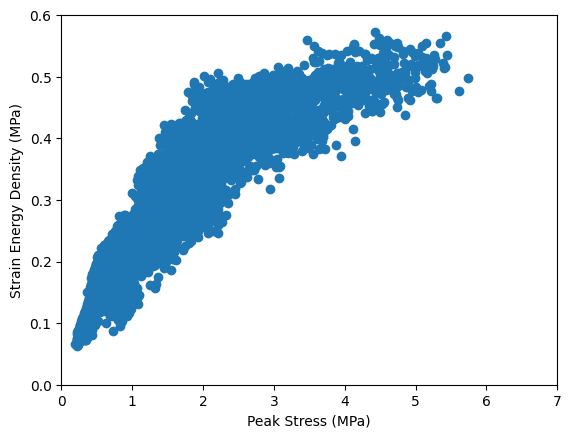

In [7]:
# Visualize dataset
plt.scatter(concatenated_df['Peak Stress (MPa)'], concatenated_df['Strain Energy Density (MPa)'])
plt.xlabel('Peak Stress (MPa)')
plt.ylabel('Strain Energy Density (MPa)')
plt.xlim(0, 7)
plt.ylim(0, 0.6)
plt.show()

### Data Histogram

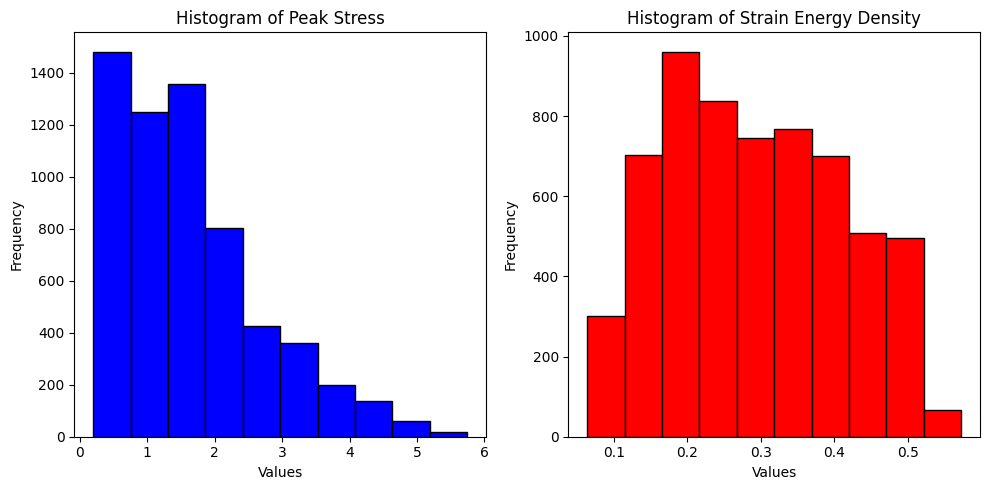

In [8]:
# Plotting histograms for columns 'A' and 'B'
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(concatenated_df['Peak Stress (MPa)'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Peak Stress')

plt.subplot(1, 2, 2)
plt.hist(concatenated_df['Strain Energy Density (MPa)'], bins=10, color='red', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Strain Energy Density')

plt.tight_layout()
plt.show()

### Defining X and Y

In [9]:
X = concatenated_df.iloc[:, :5].values
Y = concatenated_df.iloc[:, 5:].values

In [10]:
# Save dataset
#concatenated_df.to_csv('Data_iteration0.csv')

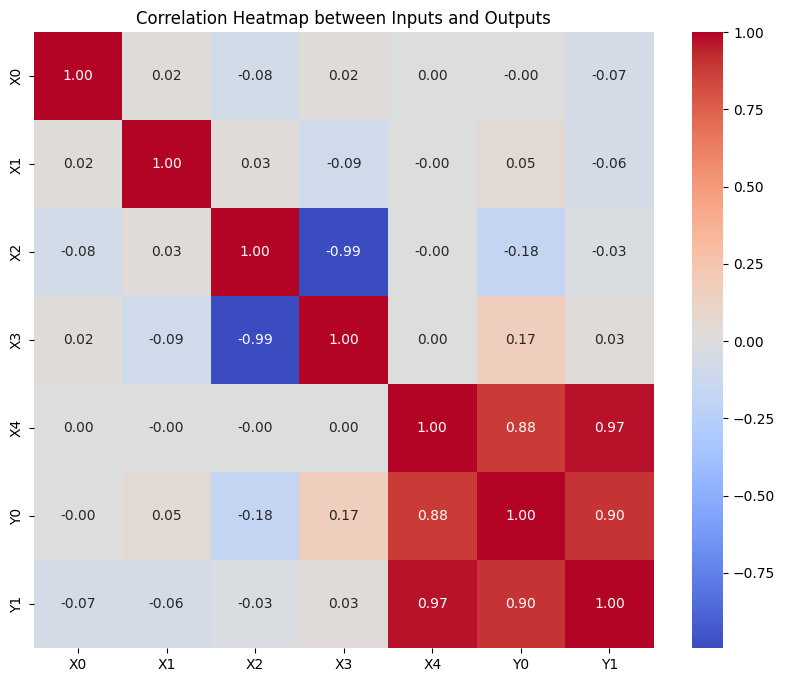

In [11]:
# Concatenate X and Y
data = np.concatenate((X, Y), axis=1)

# Create a DataFrame
df = pd.DataFrame(data, columns=[f"X{i}" for i in range(X.shape[1])] + [f"Y{j}" for j in range(Y.shape[1])])

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Inputs and Outputs')
plt.show()

## MLP

In [12]:
class SimpleMLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, output_size)
        )

    def forward(self, x):
        return self.model(x)

In [13]:
# Splitting data into training and remaining (which includes validation and test)
X_train, X_remaining, Y_train, Y_remaining = train_test_split(X, Y, test_size=0.3, random_state=seed, shuffle=True)

# Splitting remaining data into validation and test sets (50% each of the remaining 30%)
X_val, X_test, Y_val, Y_test = train_test_split(X_remaining, Y_remaining, test_size=0.5, random_state=seed, shuffle=True)

# Check if GPU is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32).to(device)

# Define the neural network
input_size = X_train.shape[1]
output_size = 2

In [14]:
# Initialize the model
forward_model = SimpleMLP(input_size, output_size).to(device)

In [15]:
# Define loss function and optimizer
criterion = nn.L1Loss()
#optimizer = optim.Adam(forward_model.parameters(), lr=0.001)
optimizer = optim.Adam(forward_model.parameters(), lr=0.001, weight_decay=1e-5)  # L2 regularization
loss_values, validation_loss, testing_loss = [], [], []

# Training the neural network
num_epochs = 5000 #30000
for epoch in range(num_epochs):
    # Forward pass
    outputs = forward_model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store the loss value
    loss_values.append(loss.item())

    # Validation phase (assume X_val_tensor and Y_val_tensor are defined for validation data)
    forward_model.eval()
    with torch.no_grad():
        val_outputs = forward_model(X_val_tensor)
        val_loss = criterion(val_outputs, Y_val_tensor).item()
        validation_loss.append(val_loss)

        test_outputs = forward_model(X_test_tensor)
        test_loss = criterion(test_outputs, Y_test_tensor).item()
        testing_loss.append(test_loss)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/5000], Loss: 0.3513
Epoch [20/5000], Loss: 0.1824
Epoch [30/5000], Loss: 0.1507
Epoch [40/5000], Loss: 0.1345
Epoch [50/5000], Loss: 0.1278
Epoch [60/5000], Loss: 0.1202
Epoch [70/5000], Loss: 0.1217
Epoch [80/5000], Loss: 0.1142
Epoch [90/5000], Loss: 0.1070
Epoch [100/5000], Loss: 0.1039
Epoch [110/5000], Loss: 0.1015
Epoch [120/5000], Loss: 0.1001
Epoch [130/5000], Loss: 0.1000
Epoch [140/5000], Loss: 0.0963
Epoch [150/5000], Loss: 0.0965
Epoch [160/5000], Loss: 0.0933
Epoch [170/5000], Loss: 0.0950
Epoch [180/5000], Loss: 0.0993
Epoch [190/5000], Loss: 0.0932
Epoch [200/5000], Loss: 0.0915
Epoch [210/5000], Loss: 0.0871
Epoch [220/5000], Loss: 0.0861
Epoch [230/5000], Loss: 0.0902
Epoch [240/5000], Loss: 0.0845
Epoch [250/5000], Loss: 0.0914
Epoch [260/5000], Loss: 0.0845
Epoch [270/5000], Loss: 0.0826
Epoch [280/5000], Loss: 0.0852
Epoch [290/5000], Loss: 0.0812
Epoch [300/5000], Loss: 0.0871
Epoch [310/5000], Loss: 0.0804
Epoch [320/5000], Loss: 0.0865
Epoch [330/5000],

In [16]:
# Save the model weights after training
#torch.save(forward_model.state_dict(), 'forward_model_weights_5000_iteration0.pth')
print("Model weights saved successfully.")

Model weights saved successfully.


Mean Squared Error (MSE): 0.029180564
Mean Absolute Error (MAE): 0.075774275
Root Mean Squared Error (RMSE): 0.1708232
R-squared (R^2): 0.9656854239032387
Mean Absolute Percentage Error (MAPE): 6.477183848619461


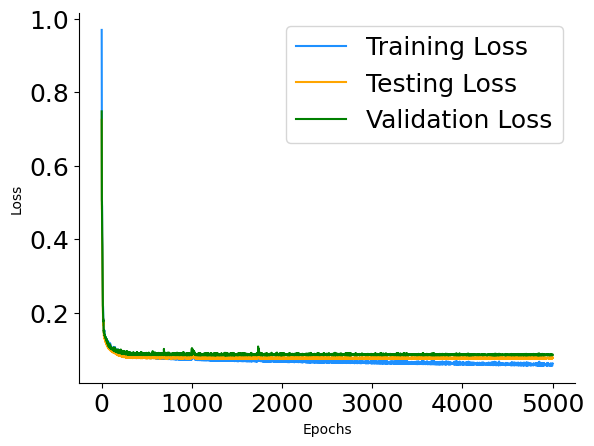

In [17]:
# Evaluation
with torch.no_grad():
    Y_pred = forward_model(X_test_tensor)
    mse = mean_squared_error(Y_test_tensor.cpu().numpy(), Y_pred.cpu().numpy())
    print("Mean Squared Error (MSE):", mse)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(Y_test_tensor.cpu().numpy(), Y_pred.cpu().numpy())
    print("Mean Absolute Error (MAE):", mae)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error (RMSE):", rmse)

    # Calculate R-squared (R^2)
    r2 = r2_score(Y_test_tensor.cpu().numpy(), Y_pred.cpu().numpy())
    print("R-squared (R^2):", r2)

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((Y_test_tensor.cpu().numpy() - Y_pred.cpu().numpy()) / Y_test_tensor.cpu().numpy())) * 100
    print("Mean Absolute Percentage Error (MAPE):", mape)

# Fix weights for forward model
for param in forward_model.parameters():
    param.requires_grad = False

# Plot the loss function
fig, ax = plt.subplots()

# Adjust tick font sizes
ax.tick_params(axis='both', which='major', labelsize=18)  # Change fontsize for major ticks
ax.tick_params(axis='both', which='minor', labelsize=18)  # Optional: Change fontsize for minor ticks

#plt.xlim(-0.1, 5000)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.plot(range(num_epochs), loss_values, label='Training Loss', color = 'dodgerblue')
plt.plot(range(num_epochs), testing_loss, label='Testing Loss', color = 'orange')
plt.plot(range(num_epochs), validation_loss, label='Validation Loss', color = 'green')
#plt.plot(np.arange(0, 3530, 1), loss_values, label='Training Loss')
#plt.plot(np.arange(0, 3530, 1), validation_loss, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.title('Loss Function over Epochs')
plt.legend(fontsize=18)
plt.savefig('Supplementary3.png', transparent = True)
plt.show()

#### Performance Evaluation

In [18]:
# Fix weights for forward model
for param in forward_model.parameters():
    param.requires_grad = False

In [19]:
Y_pred = forward_model(X_train_tensor)

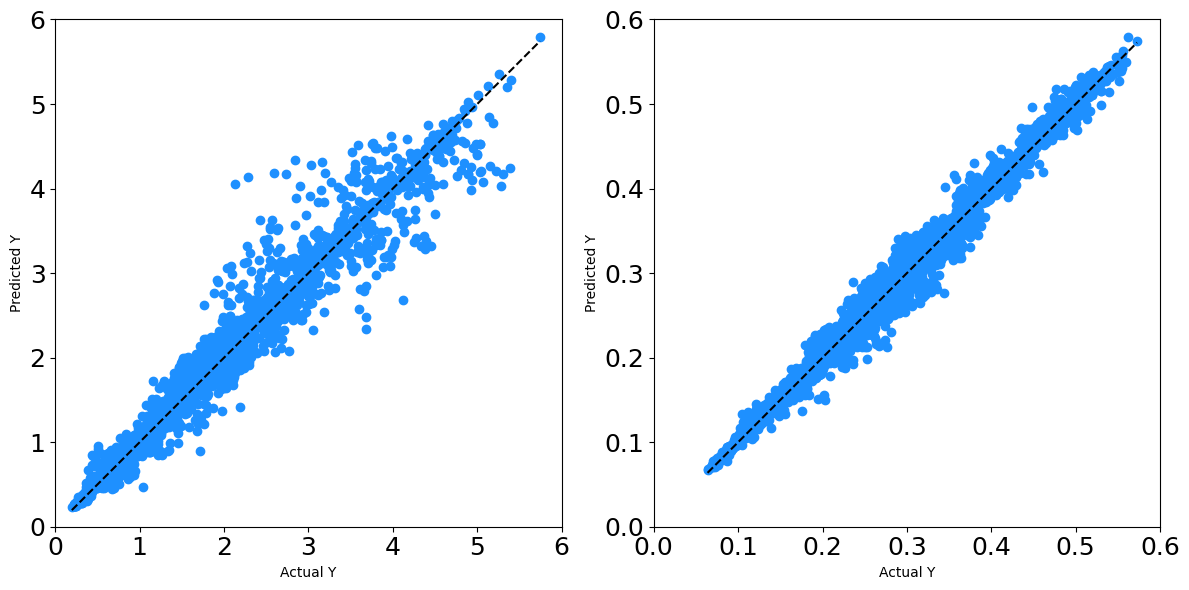

In [20]:
# Plotting the best-fit lines
plt.figure(figsize=(12, 6))

# Plotting for each dimension in Y
for i in range(Y_train_tensor.cpu().numpy().shape[1]):
    plt.subplot(1, 2, i+1)
    plt.scatter(Y_train_tensor.cpu().numpy()[:, i], Y_pred.cpu().numpy()[:, i], color='dodgerblue')
    plt.plot([min(Y_train_tensor.cpu().numpy()[:, i]), max(Y_train_tensor.cpu().numpy()[:, i])], [min(Y_train_tensor.cpu().numpy()[:, i]), max(Y_train_tensor.cpu().numpy()[:, i])], color='black', linestyle='--')
    plt.xlabel('Actual Y')
    plt.ylabel('Predicted Y')
    #plt.title(f'Dimension {i+1}')

    # Set tick font sizes
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    if i == 0:
        plt.xlim(0, 6)
        plt.ylim(0, 6)
    else:
        plt.xlim(0, 0.6)
        plt.ylim(0, 0.6)

plt.tight_layout()
plt.savefig('Supplementary3_1.png', transparent = True)
plt.show()

In [21]:
Y_pred = forward_model(X_test_tensor)

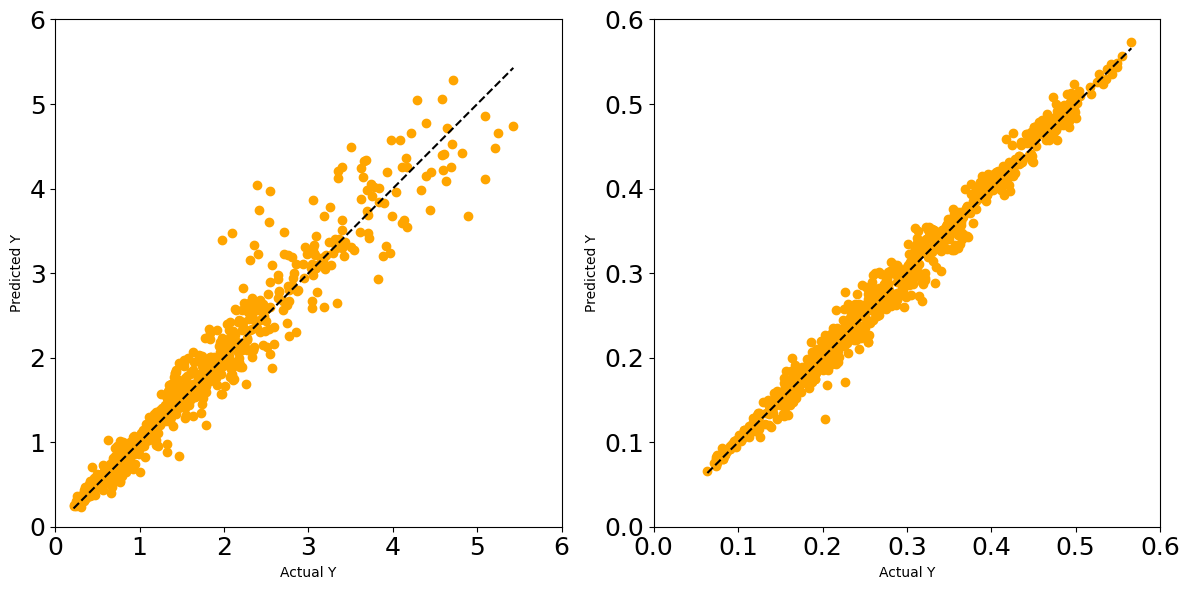

In [22]:
# Plotting the best-fit lines
plt.figure(figsize=(12, 6))

# Plotting for each dimension in Y
for i in range(Y_test_tensor.cpu().numpy().shape[1]):
    plt.subplot(1, 2, i+1)
    plt.scatter(Y_test_tensor.cpu().numpy()[:, i], Y_pred.cpu().numpy()[:, i], color='orange')
    plt.plot([min(Y_test_tensor.cpu().numpy()[:, i]), max(Y_test_tensor.cpu().numpy()[:, i])], [min(Y_test_tensor.cpu().numpy()[:, i]), max(Y_test_tensor.cpu().numpy()[:, i])], color='black', linestyle='--')
    plt.xlabel('Actual Y')
    plt.ylabel('Predicted Y')
    #plt.title(f'Dimension {i+1}')

    # Set tick font sizes
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    if i == 0:
        plt.xlim(0, 6)
        plt.ylim(0, 6)
    else:
        plt.xlim(0, 0.6)
        plt.ylim(0, 0.6)

plt.tight_layout()
plt.savefig('Supplementary3_2.png', transparent = True)
plt.show()

In [23]:
from scipy.stats import gaussian_kde

# Loop through each vector and plot its probability density

relative_error_PS = []
relative_error_SED = []

for j in range(Y_pred.shape[0]):

    # Calculate the relative error for the i-th vector
    relative_error_PS.append(np.abs(Y_pred[j][0].cpu() - Y_test_tensor[j][0].cpu()) / Y_test_tensor[j][0].cpu())
    relative_error_SED.append(np.abs(Y_pred[j][1].cpu() - Y_test_tensor[j][1].cpu()) / Y_test_tensor[j][1].cpu())

0.6706783369803063
0.8982494529540481
0.9748358862144421


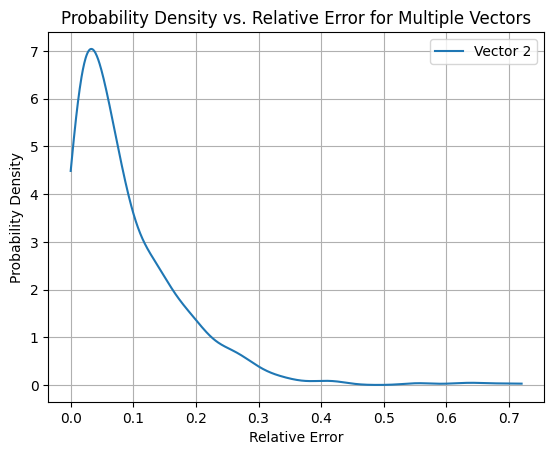

In [24]:
# Estimate the probability density

density = gaussian_kde(relative_error_PS)
x = np.linspace(0, np.max(relative_error_PS), 1000)

# Plot the probability density
plt.plot(x, density(x), label=f'Vector {i+1}')

# Calculate %RE less than 10%
samples1, samples2, samples3 = 0, 0, 0
samples1 += len([ele for ele in relative_error_PS if ele < 0.10])
samples2 += len([ele for ele in relative_error_PS if ele < 0.20])
samples3 += len([ele for ele in relative_error_PS if ele < 0.30])


print(samples1/(Y_pred.shape[0]))
print(samples2/(Y_pred.shape[0]))
print(samples3/(Y_pred.shape[0]))


# Customize the plot
plt.title('Probability Density vs. Relative Error for Multiple Vectors')
plt.xlabel('Relative Error')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

0.925601750547046
0.9956236323851203
0.9989059080962801


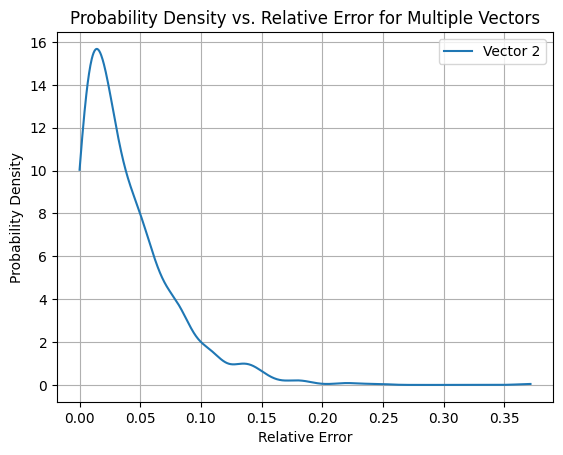

In [25]:
# Estimate the probability density

density = gaussian_kde(relative_error_SED)
x = np.linspace(0, np.max(relative_error_SED), 1000)

# Plot the probability density
plt.plot(x, density(x), label=f'Vector {i+1}')

# Calculate %RE less than 10%
samples1, samples2, samples3 = 0, 0, 0
samples1 += len([ele for ele in relative_error_SED if ele < 0.10])
samples2 += len([ele for ele in relative_error_SED if ele < 0.20])
samples3 += len([ele for ele in relative_error_SED if ele < 0.30])


print(samples1/(Y_pred.shape[0]))
print(samples2/(Y_pred.shape[0]))
print(samples3/(Y_pred.shape[0]))


# Customize the plot
plt.title('Probability Density vs. Relative Error for Multiple Vectors')
plt.xlabel('Relative Error')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()